# Hydraulic Equation

This portion of the code will import the predicted precipitation for the Bhutiya community for 2020-2070 among other water balance factors and output the necessary catchment yield to properly size the dam-pond system.

Catchment Yield (L) = Catchment Area x Avg. Annual Rainfall x Yield Coefficient

# Relevent Factors to Calculating Catchment Yield :

## Catchment Area (c_area)    [hectares]
The catchment area is the total area of land that contributes runoff into the dam.

This values has been imported from an analysis in Google Earth Pro based on the GPS coordinates and topography of the proposed site.

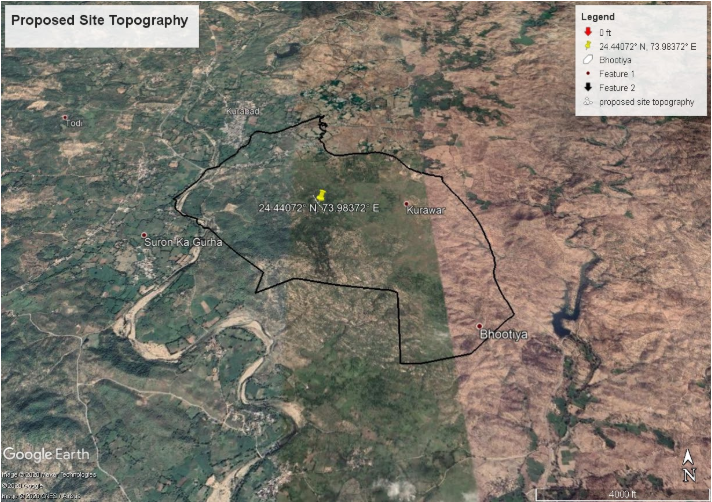

In [2]:
from IPython.display import Image
Image(filename='bhutiya_googleearthpro.png')

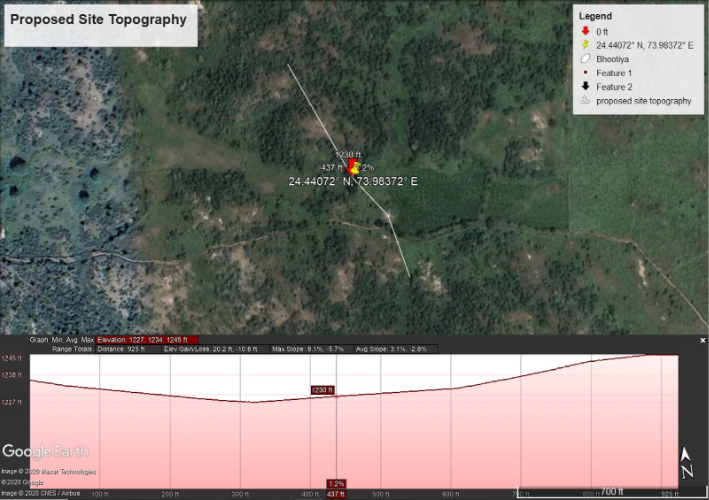

In [3]:
Image(filename='elevprofile_googleearthpro.png')

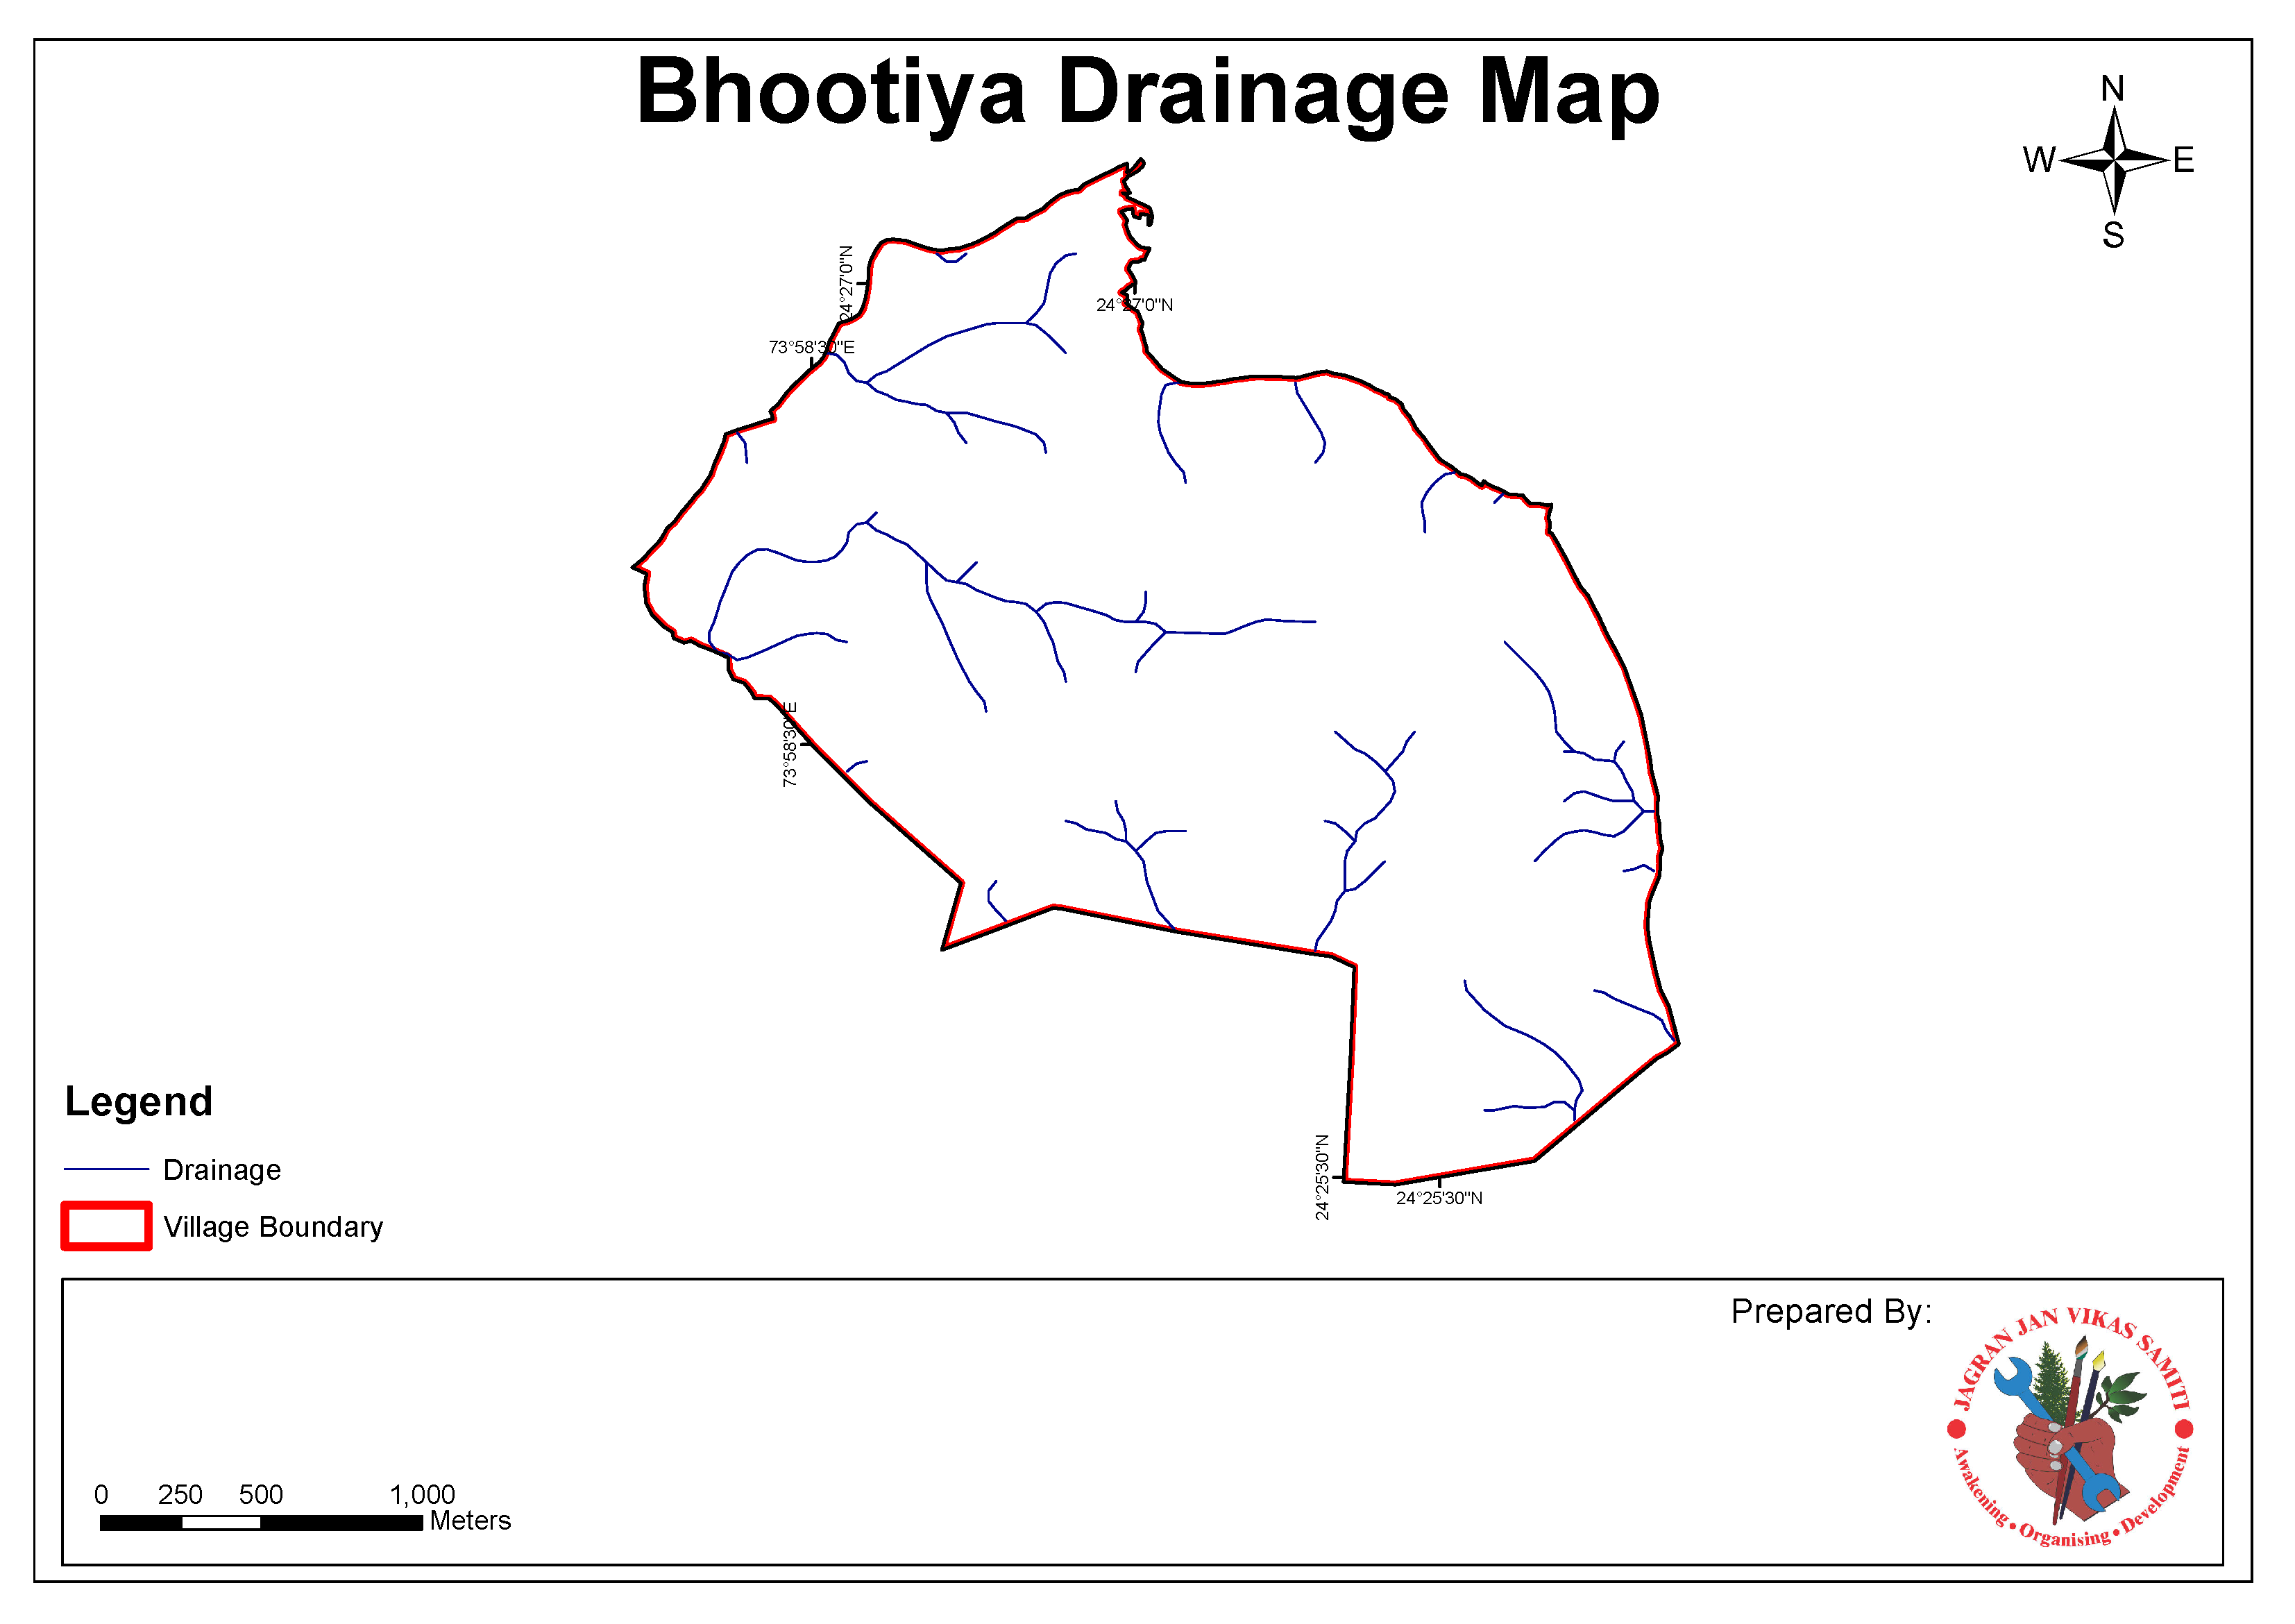

In [11]:
Image(filename='drainagemap.png')

The catchment area has been estimated using Google Earth Pro assessment of the site topography. Using the polygon tool and the representation of the drainage path determined by Jagran Jan Vikas Samiti above, a rough estimation found the catchment area of perimeter 4,390m to be 993,249m2 or 99.3249 hectares.

<p> The most recent government census recorded the total area of the village (in hectares rounded up to  one decimal place) to be 495, the catchment area determined to feed into this drainage path equates to 1/5 of the Bhutiya village area. 

In [88]:
c_area = 99.3249

## Annual Rainfall (p)    [mm/yr]
The annual rainfall averages are imported as csv from the Predictive Precipitation Model in Phase I. Rainfall is predicted in mm from 2020-2070, the projected useful life for the project. 


In [81]:
import pandas as pd

In [82]:
# Import the precipitation predicted in Phase I
p = pd.read_csv('C:\\Users\\sophiaertel\\CE6800\\predicted_precipitation.csv')

In [83]:
# Show precipitation predictions for the years 2020 through 2067
p = p[119:]
p

,Unnamed: 0,Date,Annual,JJAS,Year
119,119,12/31/2020,657.005,604.445,2020
120,120,12/31/2021,652.033,599.870,2021
121,121,12/31/2022,646.895,595.143,2022
122,122,12/31/2023,641.599,590.271,2023
123,123,12/31/2024,656.550,604.026,2024
124,124,12/31/2025,651.577,599.451,2025
125,125,12/31/2026,646.440,594.725,2026
126,126,12/31/2027,641.144,589.852,2027
127,127,12/31/2028,656.095,603.607,2028
128,128,12/31/2029,651.122,599.032,2029


In [84]:
percentmonsoonrain = p['JJAS'] / p['Annual']
percentmonsoonrain.mean()

0.9199999923243821

The calculation above of percentmonsoonrain represents the fraction of annual rains that occur during June, July, August, and September (monsoon season). On average, 92% of annual rainfall is expected to occur during these months. Therefore, the following calculation of catchment yield will use total annual precipitation values because most rainfall is occuring in a short period of time and the system must be sized for the maximum predicted yield at once.

In [85]:
# The following code requires only the precipitation for 2020-2067, remove all other columns
# p represents annual precipitation in mm/yr
p = p.drop(columns=['Unnamed: 0','Year','Date','JJAS'])

## Yield Coefficient (yc)
Only a relatively small proportion of the rainfall received in the catchment area actually runs off into watercourses or to fill dams. The majority of it infiltrates into the ground or is intercepted by vegetation. Although many factors influence this, the amount of runoff is proportional to the annual rainfall. This iteration of code will account for the effects of infiltration, evaporation, transpiration and storage and precipitation-runoff conversion with a yield coefficient.

In [86]:
yc = 0.5

# Catchment Yield Equation

Catchment yield shown in liters. Litres x 0.001 to convert to m3

In [92]:
cyield = c_area*p*yc*0.001
cyield.reset_index(drop=True)

,Annual
0,32.628478
1,32.381556
2,32.126391
3,31.863378
4,32.605882
5,32.358910
6,32.103794
7,31.840782
8,32.583285
9,32.336314


In [93]:
cyield.mean()

Annual    32.125575
dtype: float64

The average annual yield for the catchment area specified between the years 2020 and 2067 is 32.13 m^3.

# Export Expected Catchment Yield to .csv for Phase III

In [90]:
cyield.to_csv('C:\\Users\\sophiaertel\\CE6800\\catchmentyield.csv')